# ライブラリインストール&インポート

In [36]:
!pip install glmnet_py

    100% |████████████████████████████████| 378kB 6.5MB/s ta 0:00:01
    100% |████████████████████████████████| 266kB 8.9MB/s ta 0:00:01
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [38]:
import glmnet_python
from glmnet import glmnet

In [39]:
import pandas as pd
import scipy

import scipy, importlib, pprint, matplotlib.pyplot as plt, warnings
from glmnet import glmnet; from glmnetPlot import glmnetPlot 
from glmnetPrint import glmnetPrint; from glmnetCoef import glmnetCoef; from glmnetPredict import glmnetPredict
from cvglmnet import cvglmnet; from cvglmnetCoef import cvglmnetCoef
from cvglmnetPlot import cvglmnetPlot; from cvglmnetPredict import cvglmnetPredict

# データロード

In [12]:
df = pd.read_csv('QuickStartExample.csv', index_col = 0)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
1,0.273856,-0.036672,0.854727,0.967524,1.415490,0.523406,0.562688,1.111223,1.640821,0.618707,...,-0.078419,-0.603326,0.033232,-0.700885,1.157838,1.457816,0.774907,-1.268518,1.993580,-1.274886
2,2.244817,-0.546030,0.234065,-1.335030,1.313076,0.521275,-0.610035,-0.861397,-0.270463,0.230083,...,0.163141,0.762077,0.678120,-0.528267,-0.879155,-0.472913,-1.117173,-0.737732,-1.078793,1.843425
3,-0.125423,-0.606878,-0.853922,-0.148777,-0.664683,0.606616,0.161721,-0.862722,0.604210,1.193977,...,-0.945206,0.398903,-0.764785,1.285402,0.644877,0.179246,0.044738,1.105307,0.304055,0.459236
4,-0.543573,1.108358,-0.104248,1.016526,0.699904,1.655016,0.489963,0.023382,0.256030,-0.127314,...,0.641955,0.075482,-1.378464,-1.024739,-2.118362,-0.469535,0.697796,0.865636,-0.789490,0.564041
5,-1.459398,-0.274495,0.111906,-0.851788,0.315284,1.050749,1.386358,0.284501,1.140498,2.681346,...,0.367044,1.737597,-1.266127,1.451999,-0.789476,-0.984386,-1.637010,-0.582917,-1.528910,1.872963


In [43]:
x = df.iloc[:, 0:20].values
y = df.iloc[:, 20].values
print(type(x))

<class 'numpy.ndarray'>


In [44]:
t = scipy.ones((50, 1), dtype = scipy.float64)
wts = scipy.row_stack((t, 2*t))

t

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [45]:
wts.shape

(100, 1)

In [46]:
fit = glmnet(x = x.copy(), y = y.copy(), family = 'gaussian',
             weights = wts, alpha = 0.2, nlambda = 20)

In [47]:
glmnetPrint(fit)

	 df 	 %dev 	 lambdau

0 	 0.000000 	 0.000000 	 7.939020
1 	 4.000000 	 0.178852 	 4.889231
2 	 7.000000 	 0.444488 	 3.011024
3 	 7.000000 	 0.656716 	 1.854334
4 	 8.000000 	 0.784984 	 1.141988
5 	 9.000000 	 0.853935 	 0.703291
6 	 10.000000 	 0.886693 	 0.433121
7 	 11.000000 	 0.902462 	 0.266737
8 	 14.000000 	 0.910135 	 0.164269
9 	 17.000000 	 0.913833 	 0.101165
10 	 17.000000 	 0.915417 	 0.062302
11 	 17.000000 	 0.916037 	 0.038369
12 	 19.000000 	 0.916299 	 0.023629
13 	 20.000000 	 0.916405 	 0.014552
14 	 20.000000 	 0.916447 	 0.008962
15 	 20.000000 	 0.916463 	 0.005519
16 	 20.000000 	 0.916469 	 0.003399


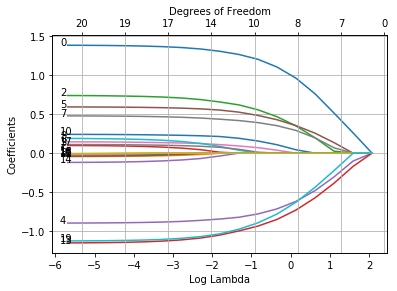

In [48]:
glmnetPlot(fit, xvar = 'lambda', label = True);